# Workshop 1, Advanced AI - Statistics Module 
AUTHORS
Alberto Dorantes D., Ph.D.

Monterrey Tech, Queretaro Campus

ABSTRACT
In this workshop we review the basics of a) descriptive statistics, b) the histogram, c) data trasformations and cleaning, and d) the normal distribution.

## Descriptive Statistics ##

Summarizes information. Descriptive statistics usually gave us a first general idea of the phenomenon. In Finance, for example, we are interested in knowing the average past return on an investment or how much on average portfolio returns move up and down over time.

The most important descriptive statisitics are 

A) measures of central tendency: 
- Arithmetic mean
- Median
- Mode

B) measures of dispersion
- Variance --> avg of square deviation from the mean
- standard deviation --> raiz cuadrada de varianza, avg of deviation from the mean

variance:

    avrg(   (X-Xmean)^2 )

standard deviation:

    sqrt(variance)

In [2]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr

In [3]:
BTC = pdr.get_data_yahoo('BTC-USD',
start="01/01/2017", interval="d")

In [4]:
BTC.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-01,1003.080017,958.698975,963.658020,998.325012,147775008,998.325012
2017-01-02,1031.390015,996.702026,998.617004,1021.750000,222184992,1021.750000
2017-01-03,1044.079956,1021.599976,1021.599976,1043.839966,185168000,1043.839966
2017-01-04,1159.420044,1044.400024,1044.400024,1154.729980,344945984,1154.729980
2017-01-05,1191.099976,910.416992,1156.729980,1013.380005,510199008,1013.380005


In [5]:
BTC.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-08-07,23359.009766,22894.556641,22963.505859,23175.890625,15886817043,23175.890625
2022-08-08,24203.689453,23176.546875,23179.527344,23809.486328,28575544847,23809.486328
2022-08-09,23898.615234,22982.000000,23811.484375,23164.318359,23555719219,23164.318359
2022-08-10,24127.414062,22771.519531,23162.898438,23947.642578,32837431722,23947.642578
2022-08-11,24809.279297,23956.478516,23984.750000,24195.890625,37873602560,24195.890625


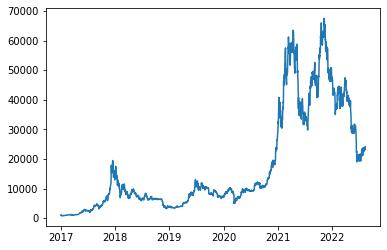

In [6]:
import matplotlib
from matplotlib.pyplot import*
plot(BTC["Close"])
show()

In [7]:
BTC.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2049 entries, 2017-01-01 to 2022-08-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2049 non-null   float64
 1   Low        2049 non-null   float64
 2   Open       2049 non-null   float64
 3   Close      2049 non-null   float64
 4   Volume     2049 non-null   int64  
 5   Adj Close  2049 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 112.1 KB


In Python we can get the previous value of a variable using the shift(n) function. This function works for Panda dataframes. Then we can calculate a new column for the simple returns of Bitcoin as follows:

In [8]:
BTC["R"] = (BTC["Close"] / BTC["Close"].shift(1)) - 1
print(BTC["R"])

Date
2017-01-01         NaN
2017-01-02    0.023464
2017-01-03    0.021620
2017-01-04    0.106233
2017-01-05   -0.122410
                ...   
2022-08-07    0.009347
2022-08-08    0.027339
2022-08-09   -0.027097
2022-08-10    0.033816
2022-08-11    0.010366
Name: R, Length: 2049, dtype: float64


In [9]:
# Now we calculate cc returns in a new column using the shift function:
BTC["r"] = np.log(BTC['Adj Close']) - np.log(BTC['Adj Close'].shift(1))
BTCR = BTC[['R','r']].copy()

In [10]:
#We have a null value for the first day since we cannot 
# calculate returns for day 1. 
# We can drop the rows with NA values to ease data calculations:
BTC= BTC.dropna()

In [11]:
#We can use the describe function applied to the r column as follows:
sumret = BTC["R"].describe()
sumret

count    2048.000000
mean        0.002420
std         0.041369
min        -0.371695
25%        -0.015888
50%         0.002220
75%         0.020927
max         0.252472
Name: R, dtype: float64

In [18]:
#To know which days were the worse, we can do a selection 
# based on a condition. Let’s see which days had a daily 
# return less than 15%:
BTC[BTC["R"]<-0.15]

,High,Low,Open,Close,Volume,Adj Close,R,r
Date,,,,,,,,
2017-09-14,3920.600098,3153.860107,3875.370117,3154.949951,2716310016,3154.949951,-0.187411,-0.207530
2018-01-16,13843.099609,10194.900391,13836.099609,11490.500000,18853799936,11490.500000,-0.168548,-0.184582
2018-02-05,8364.839844,6756.680176,8270.540039,6955.270020,9285289984,6955.270020,-0.159688,-0.173982
2020-03-12,7929.116211,4860.354004,7913.616211,4970.788086,53980357243,4970.788086,-0.371695,-0.464730
2022-06-13,26795.589844,22141.257812,26737.578125,22487.388672,68204556440,22487.388672,-0.159747,-0.174053


In [19]:
BTC[BTC["R"]>0.15].sort_values(by=['R'], ascending=False)

,High,Low,Open,Close,Volume,Adj Close,R,r
Date,,,,,,,,
2017-12-07,17899.699219,14057.299805,14266.099609,17899.699219,17950699520,17899.699219,0.252472,0.225119
2017-07-20,2900.699951,2269.889893,2269.889893,2817.600098,2249260032,2817.600098,0.239361,0.214596
2017-12-06,14369.099609,11923.400391,11923.400391,14291.500000,12656300032,14291.500000,0.199283,0.181724
2021-02-08,46203.929688,38076.324219,38886.828125,46196.464844,101467222687,46196.464844,0.187465,0.171821
2020-03-19,6329.735840,5236.968750,5245.416504,6191.192871,51000731797,6191.192871,0.181878,0.167104
2019-04-02,4905.954590,4155.316895,4156.919434,4879.877930,21315047816,4879.877930,0.173560,0.160042
2019-10-25,8691.540039,7479.984375,7490.703125,8660.700195,28705065488,8660.700195,0.155763,0.144761
2017-07-17,2230.489990,1932.619995,1932.619995,2228.409912,1201760000,2228.409912,0.154724,0.143862
2017-09-15,3733.449951,2946.620117,3166.300049,3637.520020,4148069888,3637.520020,0.152956,0.142330


In [13]:
# we can get the main descriptive statistics by individual function
print("The daily average return of Bitcoin is ", BTC["r"].mean())
print("The daily variance of Bitcoin is ", BTC["r"].var())
print("The daily standard deviation (volatility) of Bitcoin return is ", BTC["r"].std())
print("The daily median return of Bitcoin is ",BTC["r"].median())
#print(BTC.mean())

The daily average return of Bitcoin is  0.0015565718759827222
The daily variance of Bitcoin is  0.0017372863311282283
The daily standard deviation (volatility) of Bitcoin return is  0.04168076692106598
The daily median return of Bitcoin is  0.0022173493980961467


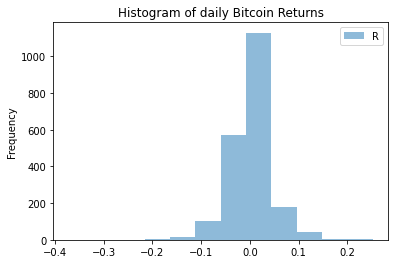

In [21]:
r_bitcoin = pd.DataFrame(BTC[["R"]])
hist=r_bitcoin.plot.hist(bins=12,alpha=0.5,title="Histogram of daily Bitcoin Returns")

## HAY MUCHOS DIAS EN LOS QUE EL BITCOIN BAJA DE VALOR O EN EL QUE LA GANANCIA ES MINIMA
## POR EL CONTRARIO, SON POCOS LOS DIAS EN LOS QUE LA GANACIA ES MAYOR 

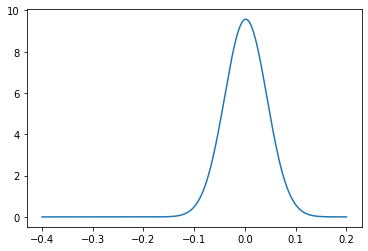

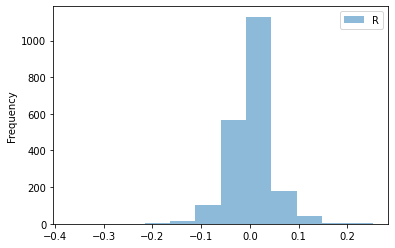

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


# Plot between -10 and 10 with .001 steps.
x_axis = np.arange(-0.4, 0.2, 0.001)
  
# Calculating mean and standard deviation
mean = BTC["r"].mean()
sd = BTC["r"].std()
  
plt.plot(x_axis, norm.pdf(x_axis, mean, sd))

r_bitcoin = pd.DataFrame(BTC[["R"]])
hist=r_bitcoin.plot.hist(bins=12,alpha=0.5)
#plt.plot.hist(r_bitcoin)

plt.show()

In [ ]:
#### ES MUY PARECIDA LA SIMULACION Y LA GRAFICA REAL
## PODEMOS CONSIDERAR QUE ESTA ES UNA BUENA APROXIMACION 
## 